<a href="https://colab.research.google.com/github/Nikithakadaparthi/ICP_3-salarydata/blob/main/ICP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

Question 1:

In [1]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('data.csv')

# Display the first few rows of the dataframe
print(df.head())
# Show basic statistical description
print(df.describe())


   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [3]:
# Check for null values
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [4]:
# Replace null values with the mean of each column
df.fillna(df.mean(), inplace=True)


In [5]:
# Aggregation for selected columns
aggregation = df[['Calories', 'Pulse']].agg(['min', 'max', 'count', 'mean'])
print(aggregation)



          Calories       Pulse
min      50.300000   80.000000
max    1860.400000  159.000000
count   169.000000  169.000000
mean    375.790244  107.461538


In [6]:
# Filter rows where calories are between 500 and 1000
filtered_df = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print(filtered_df)


     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [7]:
# Filter rows where calories > 500 and pulse < 100
filtered_df2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print(filtered_df2)


     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [8]:
# Create a new dataframe excluding the 'Maxpulse' column
df_modified = df.drop(columns=['Maxpulse'])
print(df_modified.head())


   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


In [9]:
# Drop the 'Maxpulse' column from the original dataframe
df.drop(columns=['Maxpulse'], inplace=True)
print(df.head())


   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


In [10]:
# Convert 'Calories' column to integer datatype
df['Calories'] = df['Calories'].astype(int)
print(df.dtypes)  # Check the datatype of each column


Duration    int64
Pulse       int64
Calories    int64
dtype: object


In [11]:
pip install matplotlib


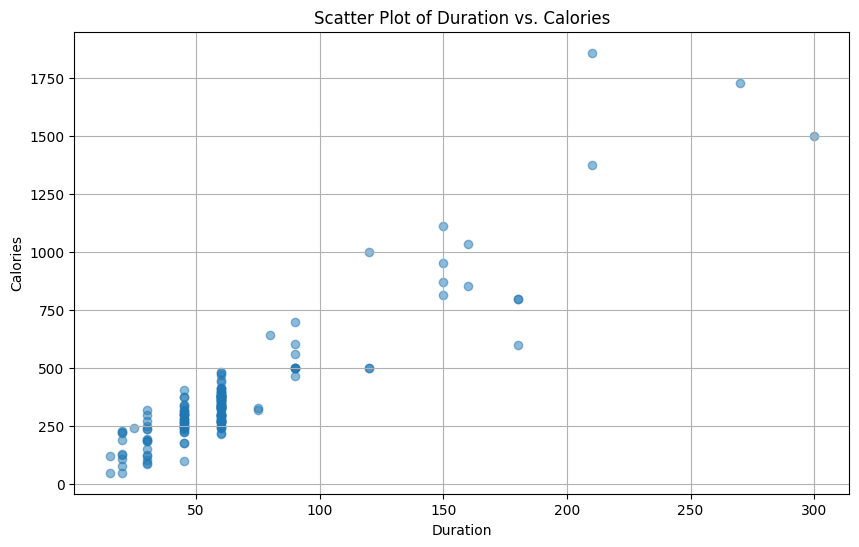

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded your DataFrame as 'df'
# If not, load it using: df = pd.read_csv('data.csv')

# Create a scatter plot for 'Duration' and 'Calories'
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure
plt.scatter(df['Duration'], df['Calories'], alpha=0.5)
plt.title('Scatter Plot of Duration vs. Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.grid(True)
plt.show()


Question 2:

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [15]:

# Load the CSV file
df = pd.read_csv('Salary_Data.csv')

# Display the first few rows to understand the structure
print(df.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [16]:
from sklearn.model_selection import train_test_split

# Assume 'YearsExperience' is the feature and 'Salary' is the target
X = df[['YearsExperience']]  # Features
y = df['Salary']              # Target

# Split the data: 1/3 for testing, 2/3 for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Test data size: {len(X_test)}")


Training data size: 20
Test data size: 10


In [17]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for train and test data
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")


Mean Squared Error (Train): 29793161.082422983
Mean Squared Error (Test): 35301898.887134895


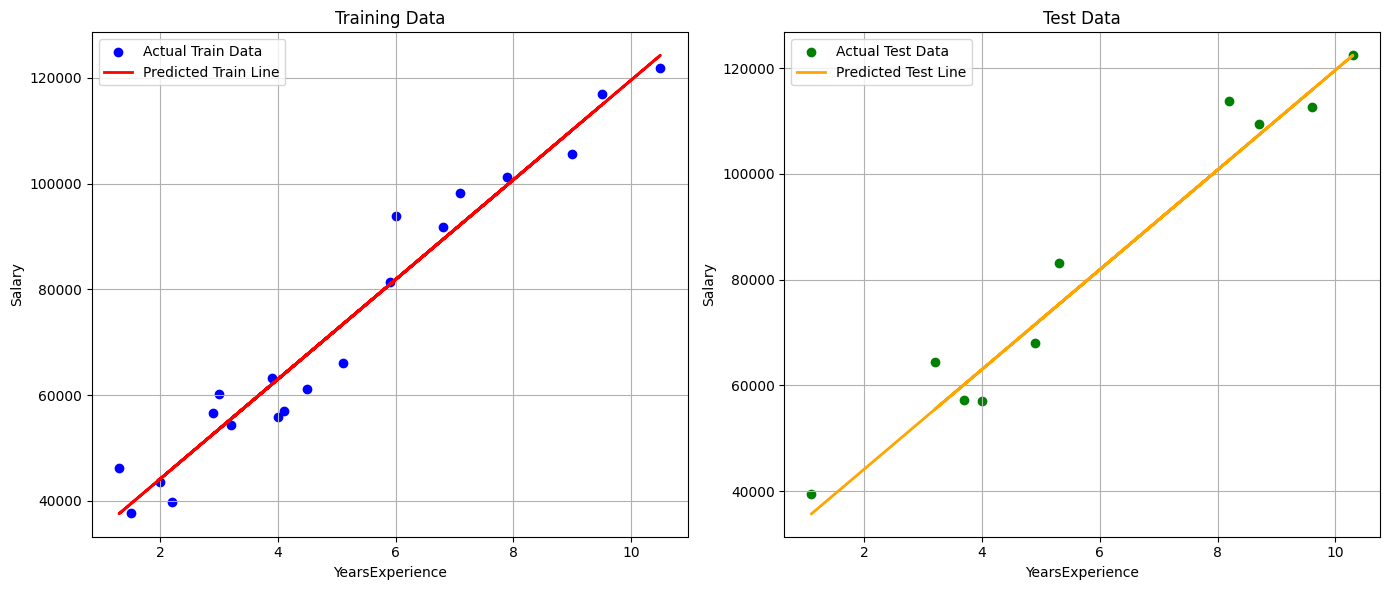

In [19]:
import matplotlib.pyplot as plt

# Plot training data and predictions
plt.figure(figsize=(14, 6))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual Train Data')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Predicted Train Line')
plt.title('Training Data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)

# Test data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Actual Test Data')
plt.plot(X_test, y_pred_test, color='orange', linewidth=2, label='Predicted Test Line')
plt.title('Test Data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
